In [233]:
from ultralytics import YOLO

In [234]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [235]:
img_names = sorted(os.listdir('car360'))

In [236]:
img_names = img_names[1:]

In [237]:
sorted_file_names = sorted(img_names, key=lambda x: int(x.split('.')[0]))
full_file_paths = [os.path.join("/Users/choismn/Desktop/coding/pattern_recognition_tp/car360", file_name) for file_name in sorted_file_names]

In [238]:
def find_largest_bbox(bboxes):
    areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    largest_bbox_index = np.argmax(areas)
    largest_bbox = bboxes[largest_bbox_index]
    return largest_bbox

def crop_image_with_bbox(image, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    cropped_image = image[y1-10:y2+10, x1-10:x2+10]
    return cropped_image

In [239]:
model = YOLO()
detection_model = YOLO('best.pt')

In [564]:
car_orientation = []

for i in range(len(full_file_paths)):
    img = cv2.imread(full_file_paths[i])
#     result = model.predict(img)
#     bbox = find_largest_bbox(np.array(result[0].boxes.xyxy))
#     new_img = crop_image_with_bbox(img, bbox)
    result_parts = detection_model.predict(img)
    cls = list(np.array(result_parts[0].boxes.cls))
    conf = list(np.array(result_parts[0].boxes.conf))
    

    if 1 in cls and 10 in cls and 7 in cls and 9 in cls and 12 in cls:
        car_orientation.append(full_file_paths[i])
    
    elif 13 in cls and 2 in cls and 8 in cls and 11 in cls:
        car_orientation.append(full_file_paths[i])



0: 448x640 1 full car, 1 tire, 1 side mirror, 1 radiator grille, 2 head ramps, 225.4ms
Speed: 9.0ms preprocess, 225.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 full car, 1 front bumper, 1 tire, 1 side mirror, 1 radiator grille, 1 head ramp, 208.2ms
Speed: 1.1ms preprocess, 208.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 full car, 1 tire, 1 side mirror, 1 radiator grille, 1 head ramp, 1 bonnet, 209.9ms
Speed: 0.9ms preprocess, 209.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 full car, 1 tire, 1 side mirror, 1 radiator grille, 1 head ramp, 214.2ms
Speed: 1.0ms preprocess, 214.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 full car, 1 tire, 1 side mirror, 1 radiator grille, 1 head ramp, 1 bonnet, 210.9ms
Speed: 1.1ms preprocess, 210.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 full car, 1 front bumper

In [565]:
car_orientation

['/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/5.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/6.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/7.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/8.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/10.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/11.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/12.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/41.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/64.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/65.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/66.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/67.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/68.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/69.jpg',
 '/Users/c

In [582]:
# grouped_list = []
# tmp=[]
# for i in range(len(car_orientation)-1):
#     if int(os.path.basename(car_orientation[i+1])[:-4]) - int(os.path.basename(car_orientation[i])[:-4]) > 10:
#         tmp.append(car_orientation[i])
#         grouped_list.append(tmp)
#         tmp=[]
#     else:
#         tmp.append(car_orientation[i])

# if len(tmp) != 0:
#     grouped_list.append(tmp)


grouped_list = []
tmp = [car_orientation[0]]

for i in range(len(car_orientation) - 1):
    if int(os.path.basename(car_orientation[i + 1])[:-4]) - int(os.path.basename(car_orientation[i])[:-4]) > 10:
        grouped_list.append(tmp)
        tmp = [car_orientation[i + 1]]
    else:
        tmp.append(car_orientation[i + 1])

# 마지막 그룹 추가
grouped_list.append(tmp)

In [583]:
grouped_list

[['/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/5.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/6.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/7.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/8.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/10.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/11.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/12.jpg'],
 ['/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/41.jpg'],
 ['/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/64.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/65.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/66.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/67.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/68.jpg',
  '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/69.

In [629]:
final = []

In [630]:
for gl in grouped_list:
    final.append(gl[len(gl)-1])
# for gl in grouped_list:
#     final.append(gl[np.random.randint(len(gl))])

In [631]:
final

['/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/12.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/41.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/74.jpg',
 '/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/112.jpg']

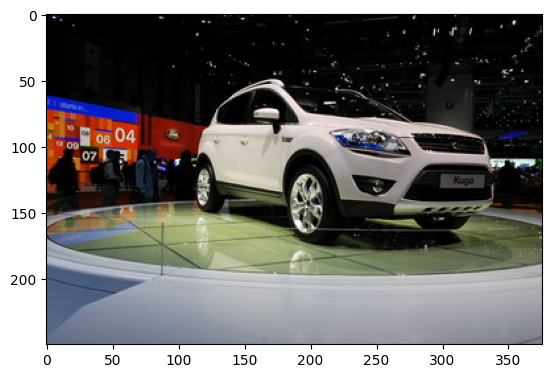

In [632]:
img = cv2.imread(final[0])
plt.imshow(img)

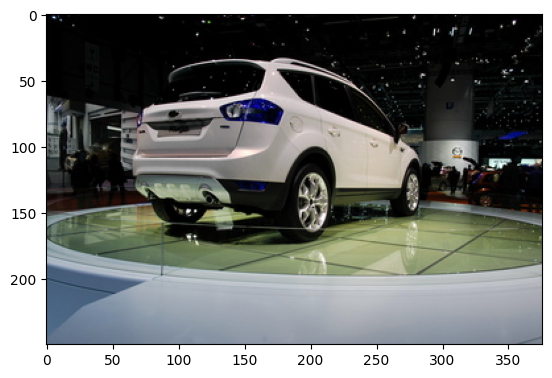

In [633]:
img = cv2.imread(final[1])
plt.imshow(img)

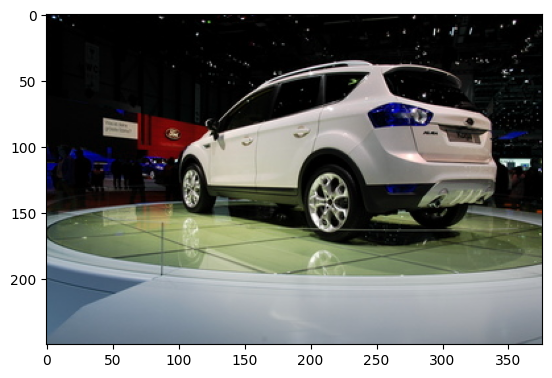

In [634]:
img = cv2.imread(final[2])
plt.imshow(img)

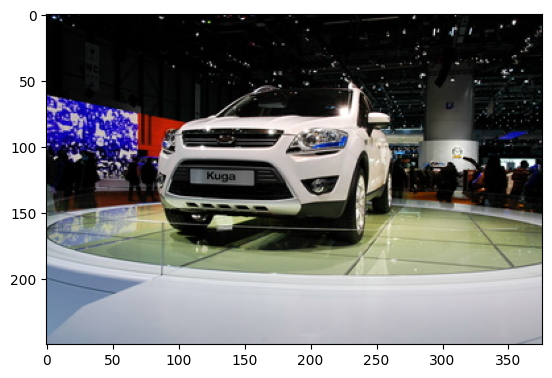

In [635]:
img = cv2.imread(final[3])
plt.imshow(img)

In [ ]:
((int((os.path.basename(final[0])[:-4]))+int((os.path.basename(final[1])[:-4])))//2)

In [666]:
front = full_file_paths[0]
passenger_front = final[0]
left_side = os.path.join("/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/", "%d.jpg"%((int((os.path.basename(final[0])[:-4]))+int((os.path.basename(final[1])[:-4])))//2))
passenger_rear = final[1]
back = os.path.join("/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/", "%d.jpg"%((int((os.path.basename(final[1])[:-4]))+int((os.path.basename(final[2])[:-4])))//2))
driver_rear = final[2]
right_side = os.path.join("/Users/choismn/Desktop/coding/pattern_recognition_tp/car360/", "%d.jpg"%((int((os.path.basename(final[2])[:-4]))+int((os.path.basename(final[3])[:-4])))//2))
driver_front = final[3]

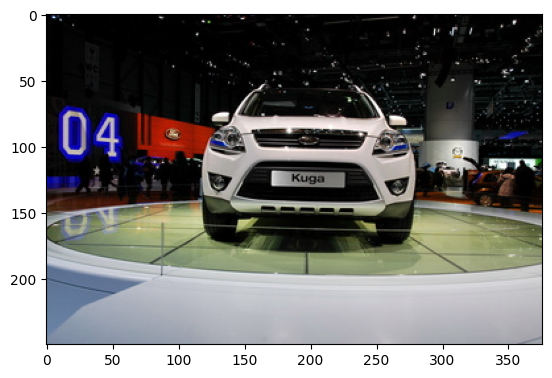

In [667]:
img = cv2.imread(front)
plt.imshow(img)

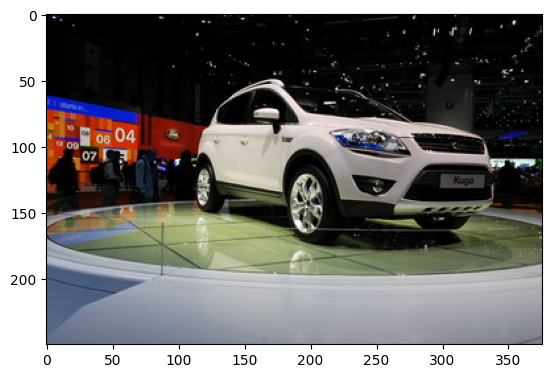

In [668]:
img = cv2.imread(passenger_front)
plt.imshow(img)

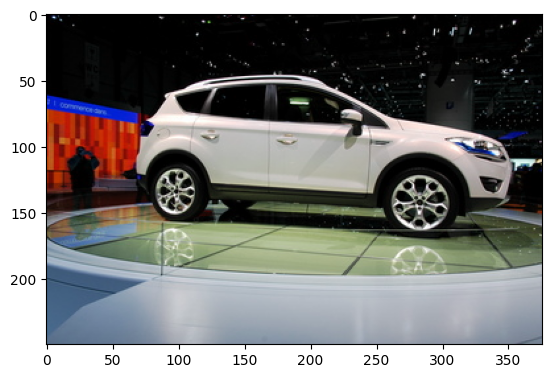

In [669]:
img = cv2.imread(left_side)
plt.imshow(img)

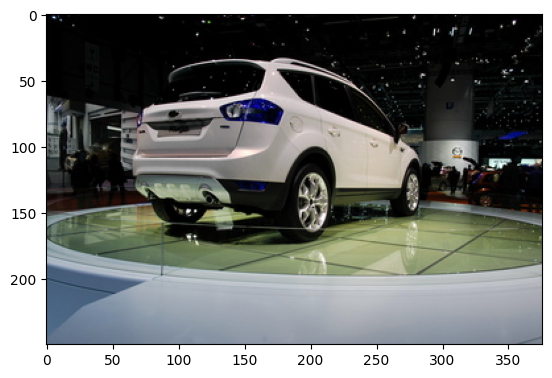

In [670]:
img = cv2.imread(passenger_rear)
plt.imshow(img)

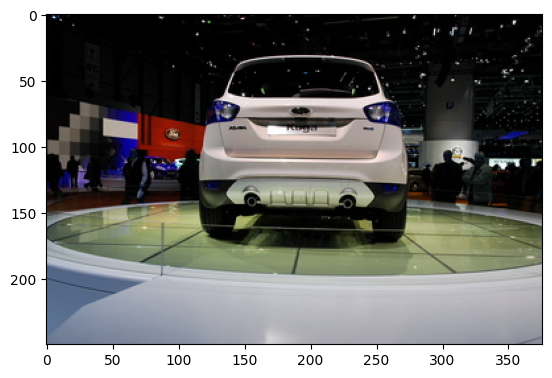

In [671]:
img = cv2.imread(back)
plt.imshow(img)

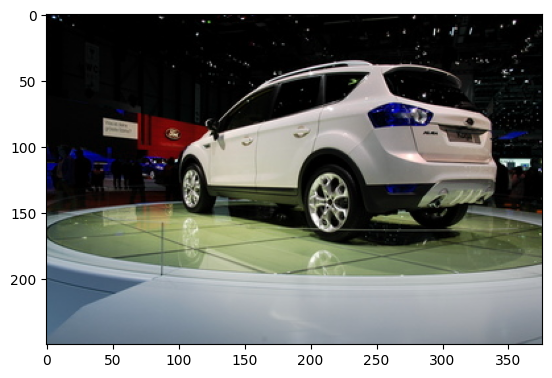

In [673]:
img = cv2.imread(driver_rear)
plt.imshow(img)

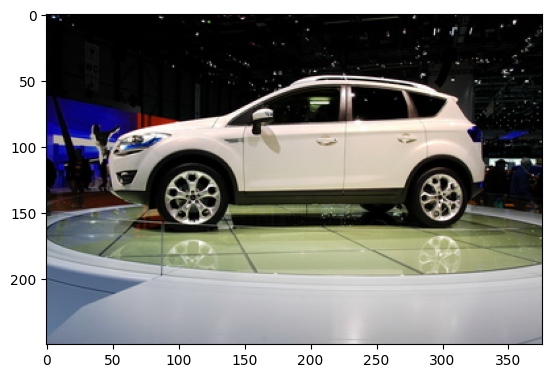

In [674]:
img = cv2.imread(right_side)
plt.imshow(img)

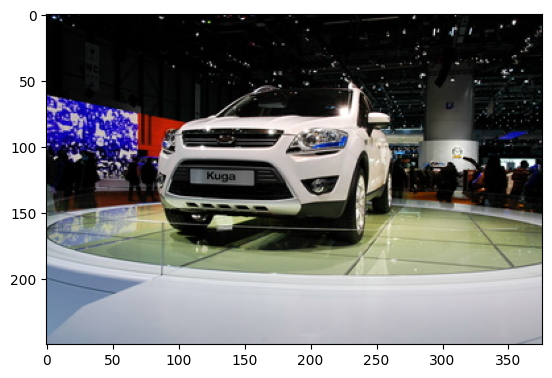

In [675]:
img = cv2.imread(driver_front)
plt.imshow(img)